### Capstone Project - Chapter no.3 - Product performance

In [ ]:
##to look at bestsellers products
SELECT
  ordi.product_id AS product_id,
  pr.name AS product_name,
  pr.category AS product_category,
  COUNT(*) AS num_of_orders
FROM
  `bigquery-public-data.thelook_ecommerce.products` AS pr
JOIN
  `bigquery-public-data.thelook_ecommerce.order_items` AS ordi
ON
  pr.id = ordi.product_id
GROUP BY
  1,
  2,
  3
ORDER BY
  num_of_orders DESC

In [ ]:
##to look at best customers
SELECT
  use.id AS user_id,
  use.first_name,
  use.last_name,
  AVG(ordi.sale_price) AS avg_sale_price
FROM
  `bigquery-public-data.thelook_ecommerce.users` AS use
JOIN
  `bigquery-public-data.thelook_ecommerce.order_items` AS ordi
ON
  use.id = ordi.user_id
GROUP BY
  1,
  2,
  3
ORDER BY
  avg_sale_price DESC
LIMIT
  5

In [ ]:
##to merge inventory data with products data to see if there is a relation between stock levels and profit
SELECT
  *
FROM
  `bigquery-public-data.thelook_ecommerce.products` AS p
JOIN (
  SELECT
    product_id,
    SUM(CASE
        WHEN sold_at IS NULL THEN 1
      ELSE
      0
    END
      ) AS availability
  FROM
    `bigquery-public-data.thelook_ecommerce.inventory_items`
  GROUP BY
    product_id ) AS pi
ON
  p.id = pi.product_id
ORDER BY
  availability DESC

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bestsellers = pd.read_csv('./Data/bigquery/bestselling_products.csv')
bestsellers.dropna()
bestsellers.head()

,product_id,product_name,product_category,num_of_orders
0,24324,Marmot Super Mica Jacket - Men's,Outerwear & Coats,20
1,23539,Harbor Bay Big & Tall Waist-Relaxer Pleated Pl...,Shorts,18
2,25846,Jockey������������ Pouch Big Man Midway�������...,Underwear,18
3,25392,Duofold Men's Heavy Weight Crew,Underwear,18
4,17151,DC Men's RD Alumni Crew Fleece,Fashion Hoodies & Sweatshirts,18


In [4]:
inventory = pd.read_csv('./Data/bigquery/inventory_products.csv')
inventory.dropna()
inventory.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id,product_id,availability
0,24324,88.000,Outerwear & Coats,Marmot Super Mica Jacket - Men's,Marmot,200.0,Men,FB2E636577105F243646D6F1E199F0BA,3,24324,38
1,23539,26.000,Shorts,Harbor Bay Big & Tall Waist-Relaxer Pleated Pl...,Harbor Bay,50.0,Men,2965658B89B496B7C43D6A6EA3AC930B,7,23539,33
2,25846,12.096,Underwear,JockeyÂ® Pouch Big Man MidwayÂ® Brief - 2 pack,Jockey,28.0,Men,F4AE163E87A012D4AB5106F993DECB4C,10,25846,33
3,2842,14.315,Active,Life is good Savor the Flavor Women's Long Sle...,Life Is Good,35.0,Women,3812F9A59B634C2A9C574610EABA5BED,9,2842,33
4,20979,39.375,Jeans,Cheap Monday Men's Tight,Cheap Monday,75.0,Men,5792A227E0F56A94E118DE0585387C32,9,20979,32


In [5]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29051 entries, 0 to 29050
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29051 non-null  int64  
 1   cost                    29051 non-null  float64
 2   category                29051 non-null  object 
 3   name                    29049 non-null  object 
 4   brand                   29027 non-null  object 
 5   retail_price            29051 non-null  float64
 6   department              29051 non-null  object 
 7   sku                     29051 non-null  object 
 8   distribution_center_id  29051 non-null  int64  
 9   product_id              29051 non-null  int64  
 10  availability            29051 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.4+ MB


In [6]:
inventory['profit'] = inventory['retail_price'] - inventory['cost']

In [7]:
inventory.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id,product_id,availability,profit
0,24324,88.000,Outerwear & Coats,Marmot Super Mica Jacket - Men's,Marmot,200.0,Men,FB2E636577105F243646D6F1E199F0BA,3,24324,38,112.000
1,23539,26.000,Shorts,Harbor Bay Big & Tall Waist-Relaxer Pleated Pl...,Harbor Bay,50.0,Men,2965658B89B496B7C43D6A6EA3AC930B,7,23539,33,24.000
2,25846,12.096,Underwear,JockeyÂ® Pouch Big Man MidwayÂ® Brief - 2 pack,Jockey,28.0,Men,F4AE163E87A012D4AB5106F993DECB4C,10,25846,33,15.904
3,2842,14.315,Active,Life is good Savor the Flavor Women's Long Sle...,Life Is Good,35.0,Women,3812F9A59B634C2A9C574610EABA5BED,9,2842,33,20.685
4,20979,39.375,Jeans,Cheap Monday Men's Tight,Cheap Monday,75.0,Men,5792A227E0F56A94E118DE0585387C32,9,20979,32,35.625


In [8]:
profit_inventory = pd.merge(bestsellers, inventory)

In [12]:
prof_inv = profit_inventory.loc[:,["product_id","product_name","product_category","num_of_orders","availability","department","profit"]]
prof_inv.head()

,product_id,product_name,product_category,num_of_orders,availability,department,profit
0,24324,Marmot Super Mica Jacket - Men's,Outerwear & Coats,20,38,Men,112.000
1,23539,Harbor Bay Big & Tall Waist-Relaxer Pleated Pl...,Shorts,18,33,Men,24.000
2,25846,Jockey������������ Pouch Big Man Midway�������...,Underwear,18,33,Men,15.904
3,25392,Duofold Men's Heavy Weight Crew,Underwear,18,30,Men,19.260
4,17151,DC Men's RD Alumni Crew Fleece,Fashion Hoodies & Sweatshirts,18,28,Men,22.400


In [13]:
##To look for the most profitable product
prof_inv.sort_values("profit", ascending=False)

,product_id,product_name,product_category,num_of_orders,availability,department,profit
14110,24447,Darla,Outerwear & Coats,6,10,Men,594.404999
6741,24341,Nobis Yatesy Parka,Outerwear & Coats,8,14,Men,568.099998
18339,23654,The North Face Apex Bionic Soft Shell Jacket -...,Outerwear & Coats,5,7,Men,539.993998
10028,23951,The North Face Nuptse 2 Jacket Deep Water Blue...,Outerwear & Coats,7,13,Men,535.478999
1359,23989,The North Face Freedom Mens Ski Pants 2013,Outerwear & Coats,11,17,Men,533.672998
...,...,...,...,...,...,...,...
2917,14202,GENUINE LEATHER SNAP ON STUDDED WHITE PIANO BE...,Accessories,10,16,Women,0.882000
7952,13629,Solid Color Leather Adjustable Skinny Belt with,Accessories,8,14,Women,0.865230
23899,12536,Individual Bra Extenders,Intimates,4,7,Women,0.736750
20340,14159,Set of 2 - Replacement Insert For Checkbook Wa...,Accessories,5,11,Women,0.312620


In [14]:
piav = prof_inv.sort_values("profit").head(100)

In [15]:
piav

,product_id,product_name,product_category,num_of_orders,availability,department,profit
2907,14235,Indestructable Aluminum Aluma Wallet - RED,Accessories,10,20,Women,0.01170
20340,14159,Set of 2 - Replacement Insert For Checkbook Wa...,Accessories,5,11,Women,0.31262
23899,12536,Individual Bra Extenders,Intimates,4,7,Women,0.73675
7952,13629,Solid Color Leather Adjustable Skinny Belt with,Accessories,8,14,Women,0.86523
2917,14202,GENUINE LEATHER SNAP ON STUDDED WHITE PIANO BE...,Accessories,10,16,Women,0.88200
...,...,...,...,...,...,...,...
11164,5799,Women's 1/2 Solid Leggings in One Regular Size...,Leggings,7,12,Women,2.13843
23999,11016,Levusha Fashions Ladies Panties Fine Nylon Spa...,Intimates,4,5,Women,2.16000
13667,28715,EarPro Fleece Ear Warmers (6 colors to choose ...,Accessories,6,9,Men,2.16108
520,24963,RHINO SOCKS SS series Bad Brew sand/white ankl...,Socks,12,21,Men,2.19833


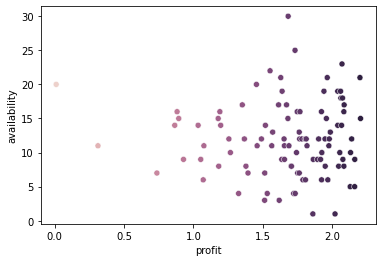

In [16]:
##To show if there is a correlation between profit and availability
sns.scatterplot(data=piav, x="profit", y="availability", hue='profit', legend=False)

plt.show()